### Summary
In this part, I will summarize the ways of **exploring data by visualization and statistics** 

Exploring can be diviede into major  two step

1. Explore the single variable
2. Explore the relationship among multiple variables. 

In [16]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import sklearn.model_selection as model_selection
from sklearn.model_selection import learning_curve

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV



In [5]:
train = pd.read_csv('./input/titanic/train.csv')
test = pd.read_csv('./input/titanic/test.csv')
combine = [train, test]

In [4]:
train_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


### 0. Filling missing data


In [24]:
for dataset in combine:
    dataset['title']=dataset.Name.apply(lambda x: x.split('.')[0].split(',')[1].strip())


newtitles={
    "Capt":       "Officer",
    "Col":        "Officer",
    "Major":      "Officer",
    "Jonkheer":   "Royalty",
    "Don":        "Royalty",
    "Sir" :       "Royalty",
    "Dr":         "Officer",
    "Rev":        "Officer",
    "the Countess":"Royalty",
    "Dona":       "Royalty",
    "Mme":        "Mrs",
    "Mlle":       "Miss",
    "Ms":         "Mrs",
    "Mr" :        "Mr",
    "Mrs" :       "Mrs",
    "Miss" :      "Miss",
    "Master" :    "Master",
    "Lady" :      "Royalty"}

for dataset in combine:
    dataset['title']=dataset.title.map(newtitles)




In [26]:
train.groupby(['title','Sex']).Age.mean()

title    Sex   
Master   male       4.574167
Miss     female    21.804054
Mr       male      32.368090
Mrs      female    35.718182
Officer  female    49.000000
         male      46.562500
Royalty  female    40.500000
         male      42.333333
Name: Age, dtype: float64

In [28]:
def newage (cols):
    title=cols[0]
    Sex=cols[1]
    Age=cols[2]
    if pd.isnull(Age):
        if title=='Master' and Sex=="male":
            return 4.57
        elif title=='Miss' and Sex=='female':
            return 21.8
        elif title=='Mr' and Sex=='male': 
            return 32.37
        elif title=='Mrs' and Sex=='female':
            return 35.72
        elif title=='Officer' and Sex=='female':
            return 49
        elif title=='Officer' and Sex=='male':
            return 46.56
        elif title=='Royalty' and Sex=='female':
            return 40.50
        else:
            return 42.33
    else:
        return Age

train.Age=train[['title','Sex','Age']].apply(newage, axis=1)
test.Age=test[['title','Sex','Age']].apply(newage, axis=1)


train.Fare=train.Fare.fillna(train.Fare.mean())
test.Fare=test.Fare.fillna(test.Fare.mean())
train.Embarked=train.Embarked.fillna(train.Embarked.mode()[0])

test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
title            0
dtype: int64

### 1. Explore each variable's correlation with survival using statistics

In [29]:
var_name = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

for var in var_name:
    print(train.groupby([var]).Survived.mean())
    print("\n")

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64


Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64


Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64




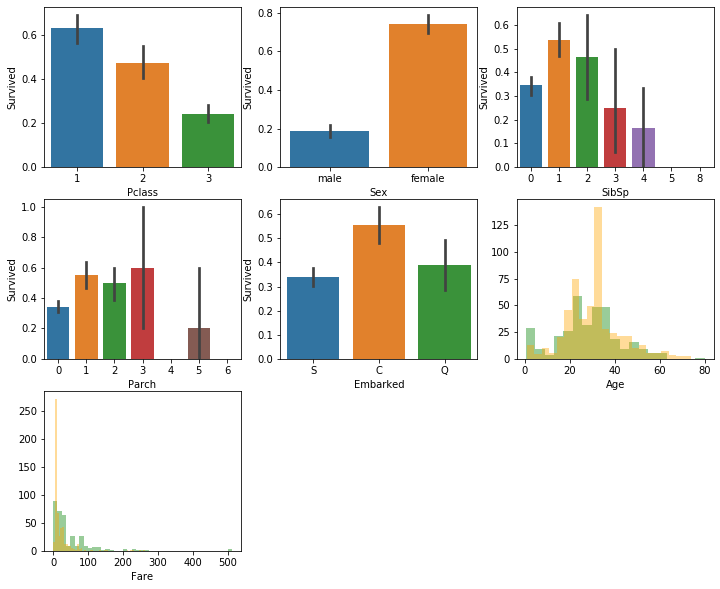

In [32]:
warnings.filterwarnings(action="ignore")
plt.figure(figsize=[12,10])
plt.subplot(3,3,1)
sns.barplot('Pclass','Survived',data=train)

plt.subplot(3,3,2)
sns.barplot('Sex','Survived',data=train)

plt.subplot(3,3,3)
sns.barplot('SibSp','Survived',data=train)

plt.subplot(3,3,4)
sns.barplot('Parch','Survived',data=train)

plt.subplot(3,3,5)
sns.barplot('Embarked','Survived',data=train)

plt.subplot(3,3,6)
sns.distplot(train[train.Survived==1].Age, color='green', kde=False)
sns.distplot(train[train.Survived==0].Age, color='orange', kde=False)

plt.subplot(3,3,7)
sns.distplot(train[train.Survived==1].Fare, color='green', kde=False)
sns.distplot(train[train.Survived==0].Fare, color='orange', kde=False)

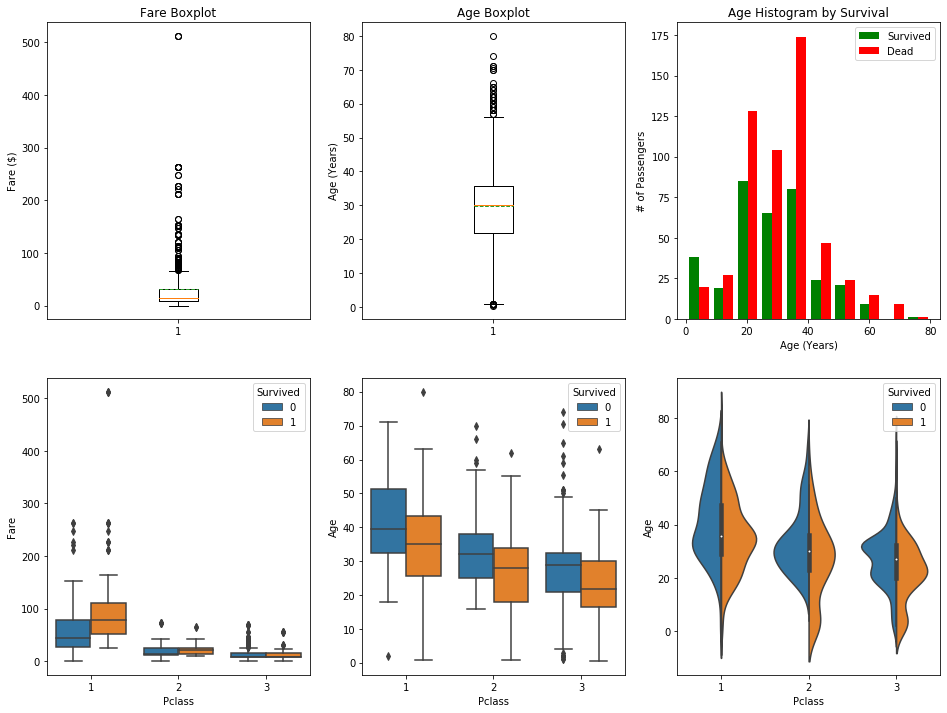

In [44]:
## using box plot and another hist plot

plt.figure(figsize=[16,12])

plt.subplot(231)
plt.boxplot(x=train['Fare'], showmeans = True, meanline = True)
plt.title('Fare Boxplot')
plt.ylabel('Fare ($)')

plt.subplot(232)
plt.boxplot(x=train['Age'], showmeans = True, meanline = True)
plt.title('Age Boxplot')
plt.ylabel('Age (Years)')

plt.subplot(233)
plt.hist(x = [train[train['Survived']==1]['Age'], train[train['Survived']==0]['Age']], 
         stacked=False, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Age Histogram by Survival')
plt.xlabel('Age (Years)')
plt.ylabel('# of Passengers')
plt.legend()

plt.subplot(234)
sns.boxplot(x = 'Pclass', y = 'Fare', hue = 'Survived', data = train)

plt.subplot(235)
sns.boxplot(x = 'Pclass', y = 'Age', hue = 'Survived', data = train)

plt.subplot(236)
sns.violinplot(x = 'Pclass', y = 'Age', hue = 'Survived', data = train, split = True)




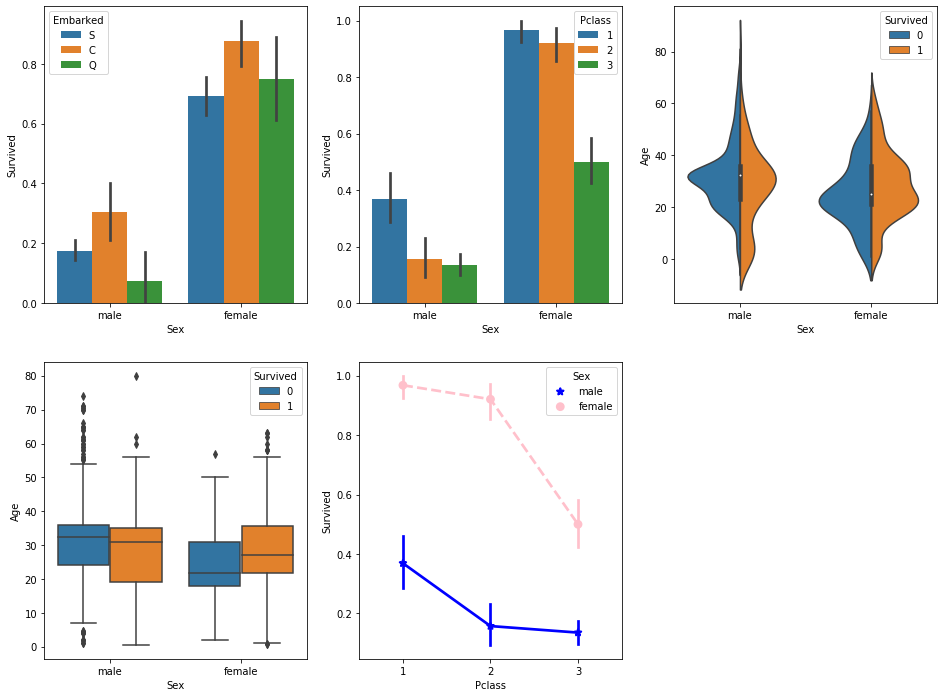

In [53]:
plt.figure(figsize=[16,12])

plt.subplot(231)

sns.barplot(x = 'Sex', y = 'Survived', hue = 'Embarked', data=train)
plt.subplot(232)
sns.barplot(x = 'Sex', y = 'Survived', hue = 'Pclass', data=train)

plt.subplot(233)
sns.violinplot(x = 'Sex', y = 'Age', hue = 'Survived', data = train, split = True)

plt.subplot(234)
sns.boxplot(x = 'Sex', y = 'Age', hue = 'Survived', data = train)

plt.subplot(235)
#how does class factor with sex & survival compare
sns.pointplot(x="Pclass", y="Survived", hue="Sex", data=train,
              palette={"male": "blue", "female": "pink"},
              markers=["*", "o"], linestyles=["-", "--"])

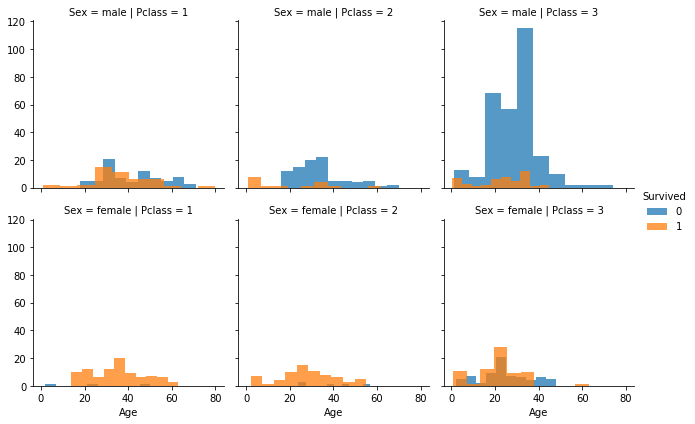

In [54]:
#histogram comparison of sex, class, and age by survival
h = sns.FacetGrid(train, row = 'Sex', col = 'Pclass', hue = 'Survived')
h.map(plt.hist, 'Age', alpha = .75)
h.add_legend()

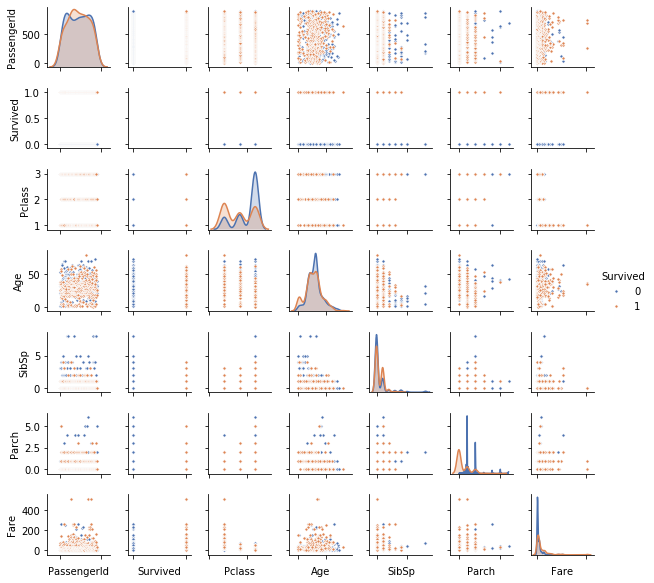

In [56]:
#pair plots of entire dataset
pp = sns.pairplot(train, hue = 'Survived', palette = 'deep', size=1.2, diag_kind = 'kde', diag_kws=dict(shade=True), plot_kws=dict(s=10) )
pp.set(xticklabels=[])

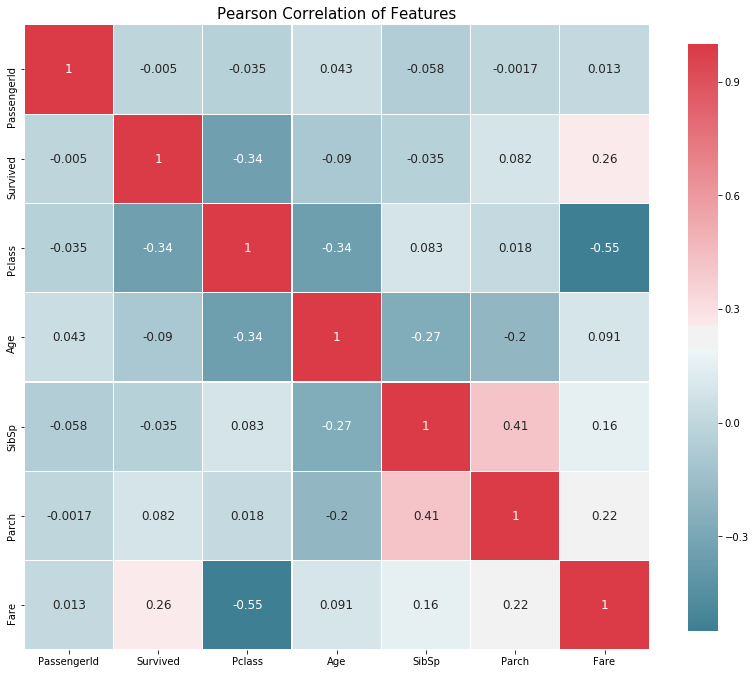

In [57]:
#correlation heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(train)

#### 1.1 Summary

##### bar plot
When it is a catergorical variable, it can be used. 

- seaborn.barplot(x=None, y=None, hue=None, data=None)
- It is also important to keep in mind that a bar plot shows only the mean (or other estimator) value
- but in many cases it may be more informative to show the distribution of values at each level of the categorical variables. 

##### distplot
We can use hist graph to present the distribution of the continuous numberic data. 

Flexibly plot a univariate distribution of observations

- This function combines the matplotlib **hist function**, with automatic calculation of a good default bin size

##### box plot

box plot is another way to show the distribution of continuous numberic data.

##### seaborn.violinplot

Like box plot , it is also a kind of distribution represention

Draw a combination of boxplot and kernel density estimate.

- A violin plot plays a similar role as a box and whisker plot.
- It shows the **distribution** of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared.

##### point plot 
very similar to line plot. Bar plot is for ditribution, while point plot is for data tendency comparisons.

- seaborn.pointplot(x=None, y=None, hue=None, data=None,
- Point plots can be more useful than bar plots for focusing comparisons between different levels of one or more categorical variables.
- It is important to keep in mind that a point plot shows only the mean (or other estimator) value

##### FacetGrid
use seaborn FacetGrid to comapre by different catergoraical level

##### Pair plot
Lazy way to get the plot of each pair variable

By default, this function will create a grid of Axes such that each variable in data will by shared in the y-axis across a single row and in the x-axis across a single column. 

##### Correlation heap map

This is very useful to explore the  correlation among variables. And we may construct a new feature according to the correlation

### Conclusion

In the first step, we can explore a single variable

We can use bar plot to explore the categorical type data.

We can use box plot, hist plot to explore the distribution of data.

In the second step, go to explore the correlation between two variables.

We can use Correlation heap map to explore each pari variable correlation, an 
